Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 5** | **Line and Circle Detection**
**Name** | Dela Cruz, Gabrielle
**Section** | CPE32S3
**Date Performed**: | February 20, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

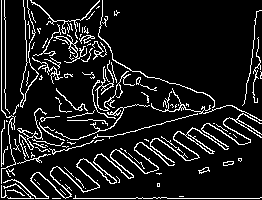

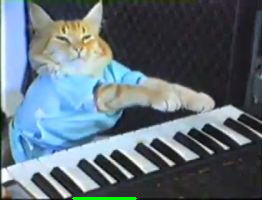

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

In [ ]:
import cv2
import numpy as np

def planetDetection(image_path):
    planets = cv2.imread('/content/planets.jpg')
    gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)

    n = 5 # Our testing value
    img = cv2.medianBlur(gray_img, n)
    cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    circles = cv2.HoughCircles(
        img, cv2.HOUGH_GRADIENT, dp=1, minDist=80,
        param1=80, param2=40, minRadius=30, maxRadius=200
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(planets, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Outer circle

        print(f"Number of detected planets: {len(circles[0])}")
    else:
        print("No planets detected.")

    cv2_imshow(planets)

Number of detected planets: 7


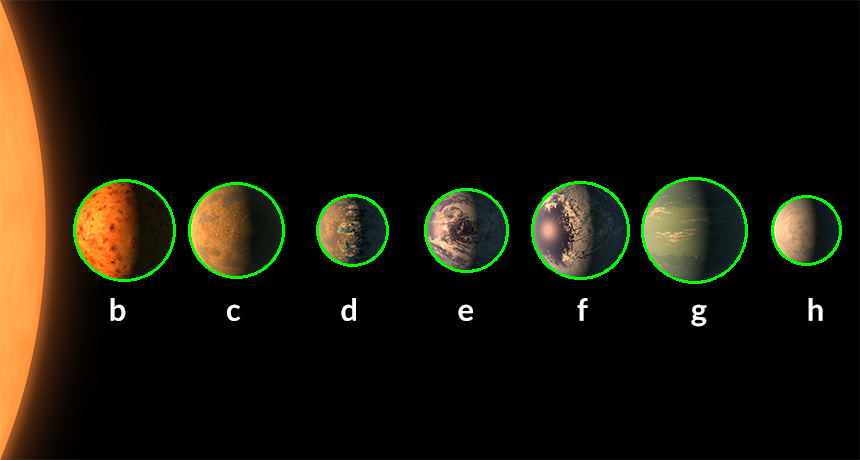

In [ ]:
planetDetection('/content/planets.jpg')

What happens to the code once you run **and the value of n is 5**?

*The image is produced with a moderate amount of blur by reducing noise in the image by replacement of each pixel value with the median value of neighboring pixels as defined by the kernel.*

Change the value to 9, **what happens to the image**?

*It will have a stronger blurring effect due to the larger kernel size by 9x9 with further reduction to noise and smoother edges.*

Lastly, change the value to 15, **what can you say about the resulting image?**

*It produces the most blurring in the image.*

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

*In these outputs, increasing the number of ```n``` affects the kernel size which furthers the strength of blurring effect. In turn, it will reduce more noise and the edges become smoother. May this be beneficial to noisy images, however, there is a potential loss of detail if applied images contain smaller details which will be sacrificed.*

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

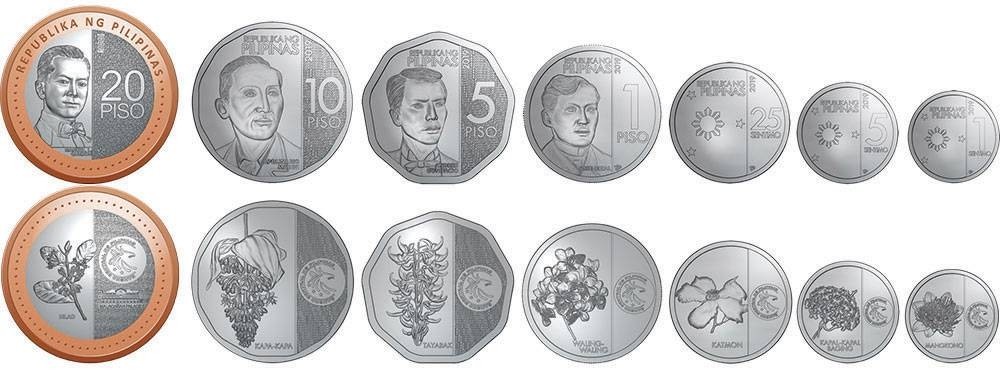

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

*Since Hough Transform can be used to detect straight and circular lines, we use corresponding variation of detecting either. With this, using Houghlines to detect circles is not possible since it is used for straight lines. Same can be said for Houghcircles used primarily for circles and not their straight line counterpart.*

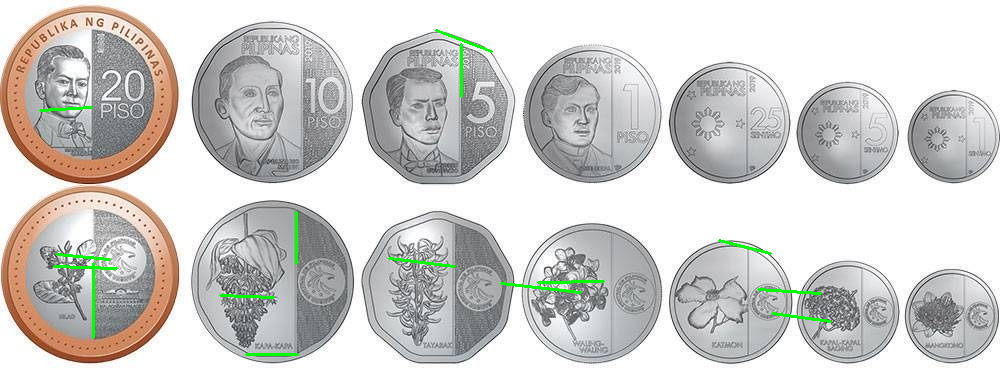

In [ ]:
# Creating a function using HoughLines to detect lines
import cv2
import numpy as np

def detectLines(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 1)

    # Use refined Canny edge detection thresholds
    edges = cv2.Canny(blurred, 80, 200, apertureSize=3)

    # Use higher minLineLength and maxLineGap to filter short and fragmented lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 25, minLineLength=50, maxLineGap=6)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return img

image_path = '/content/coins.jpg'
output_image = detectLines(image_path)

cv2_imshow(output_image)

In [ ]:
# Creating a function using HoughCircles to detect circles
def circleDetection(image_path):
    coins = cv2.imread(image_path)
    gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.5, minDist=80,
                               param1=100, param2=50, minRadius=30, maxRadius=102)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(coins, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Drawing circle

        print(f"Number of Circles: {len(circles[0])}")  # Count circles
    else:
        print("No circles found.")

    coins_rgb = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
    return coins_rgb # return rgb version of image

Number of Circles: 14


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
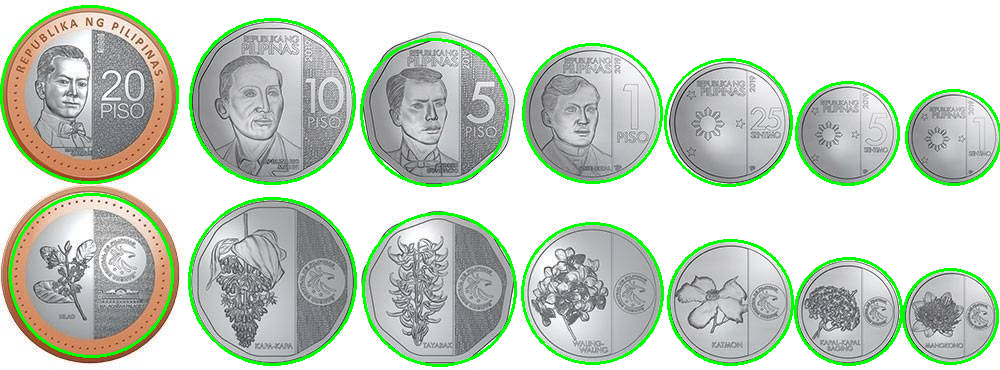

In [ ]:
circleDetection('/content/coins.jpg')

## 5. Summary, Conclusions and Lessons Learned

This notebook introduces the concept o Hough Transform and its application by the variation of line and circle detection in algorithms that can be used in images, as a part of OpenCV library. With the use of HoughLinesP and HoughCircles in the images, the process of detecting lines can be applied. These are handled by parameters such as minimum line length, distance between circles, radi, and the maximum line gaps. In the precise detection of circles and lines, experimentation in the parameters is a must to achieve desired results.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*